In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

import liepy as lp

# Spin precession in a magnetic field

The Hamiltonian for a spin in a magnetic field $\vec{B}$ is given as

$$H = -\gamma \vec{B}\cdot \vec{S}$$

where $\vec{S}$ are the spin operators that generate the $su(2)$ lie algebra. Here we let $\gamma = \hbar = 1$.

The time evolution is then given by:

$$U(t, 0) = \exp\left(-iHt\right) = \exp(-i t\vec{B}\cdot \vec{S})$$

The following exericse uses `liepy` to obtain the spin matrices, and then compute the time evolution of a spin state.

In [2]:
# Let our "particle" have spin-1

j = 1

spin = np.array(lp.gen_su2(j))

print(f"Spin matrices\n{spin}")

# Use the Z-direction as a basis, and obtain an initial eigenstate 
state = 0
psi_0 = np.linalg.eig(spin[0])[1][:,[state]]

print(f"Initial state\n{psi_0}")

Spin matrices
[[[ 1.        +0.j  0.        +0.j  0.        +0.j]
  [ 0.        +0.j  0.        +0.j  0.        +0.j]
  [ 0.        +0.j  0.        +0.j -1.        +0.j]]

 [[ 0.        +0.j  0.70710678+0.j  0.        +0.j]
  [ 0.70710678+0.j  0.        +0.j  0.70710678+0.j]
  [ 0.        +0.j  0.70710678+0.j  0.        +0.j]]

 [[ 0.        +0.j  0.70710678+0.j  0.        +0.j]
  [-0.70710678+0.j  0.        +0.j  0.70710678+0.j]
  [ 0.        +0.j -0.70710678+0.j  0.        +0.j]]]
Initial state
[[1.+0.j]
 [0.+0.j]
 [0.+0.j]]


In [3]:
B = np.array([0,1,0])

print(f"Direction of B\n{B}")

Direction of B
[0 1 0]


In [4]:
# Compute the time evolution

H = np.sum(B[:, None, None] * spin, axis=0)

def U(H, t):
    return expm(-1j * H * t)

U_t = [U(H, t) for t in np.linspace(0,10,100)]

In [5]:
# Get the state at every time

psi_t = [U_i @ psi_0 for U_i in U_t]

## Plot of probabilities in time

Text(0.5, 0, 't')

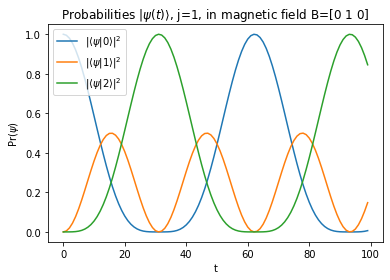

In [6]:
prob = np.abs(psi_t)**2

for i in range(prob.shape[1]):
    plt.plot(prob[:,i,:], label=r"$|\langle\psi|{}\rangle|^2$".format(i))
plt.legend()

plt.title(r"Probabilities $|\psi(t)\rangle$, j={}, in magnetic field B={}".format(j,B))
plt.ylabel(f"Pr($\psi$)")
plt.xlabel("t")